In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
heartData = pd.read_csv("heart-failure-prediction/heart.csv")
heartData.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR   
0   40   M           ATA        140          289          0     Normal    172  \
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [3]:
heartData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
heartData.dropna()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG   
0     40   M           ATA        140          289          0     Normal  \
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N      0.0       Up             0  
1      156              N      1.0     Flat             1  
2       98              N      0.0       Up             0  
3      108              Y      1.5     Flat             1  
4      122              N      0.0       Up             0  
..     ...            ...      ...      ...           ...  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0  

[918 rows x 12 columns]

In [5]:
heartData.describe()

Age   RestingBP  Cholesterol   FastingBS       MaxHR   
count  918.000000  918.000000   918.000000  918.000000  918.000000  \
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

In [6]:
heartData = heartData[(heartData["Cholesterol"] != 0) & (heartData["RestingBP"] != 0) & (heartData["Sex"] != "F")]

In [7]:
heartData.describe()

Age   RestingBP  Cholesterol   FastingBS       MaxHR   
count  564.000000  564.000000   564.000000  564.000000  564.000000  \
mean    53.102837  133.359929   241.040780    0.187943  138.040780   
std      9.556603   16.842386    57.509194    0.391014   24.922903   
min     28.000000   92.000000    85.000000    0.000000   69.000000   
25%     46.000000  120.000000   206.750000    0.000000  120.000000   
50%     54.000000  130.000000   234.000000    0.000000  139.500000   
75%     59.000000  140.000000   272.250000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  564.000000    564.000000  
mean     0.978191      0.560284  
std      1.096840      0.496793  
min     -0.100000      0.000000  
25%      0.000000      0.000000  
50%      0.800000      1.000000  
75%      1.800000      1.000000  
max      5.600000      1.000000

In [8]:
heartData.shape

(564, 12)

In [9]:
heartData.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR   
0   40   M           ATA        140          289          0     Normal    172  \
2   37   M           ATA        130          283          0         ST     98   
4   54   M           NAP        150          195          0     Normal    122   
5   39   M           NAP        120          339          0     Normal    170   
7   54   M           ATA        110          208          0     Normal    142   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
2              N      0.0       Up             0  
4              N      0.0       Up             0  
5              N      0.0       Up             0  
7              N      0.0       Up             0

In [15]:
from sklearn.preprocessing import StandardScaler

#Standardisierung
features = ["Age","RestingBP", "Cholesterol"]

# Separating out the features
x = heartData.loc[:, features].values

# Separating out the target
y = heartData.loc[:,["HeartDisease"]].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [12]:
finalDf = pd.concat([principalDf, heartData[["HeartDisease"]]], axis = 1)

In [13]:
finalDf.head()

principal component 1  principal component 2  HeartDisease
0               0.240503               0.849897           0.0
1              -0.194584               0.865418           NaN
2               0.069480              -0.791405           0.0
3              -0.253883               1.888923           NaN
4              -1.446605              -0.127782           0.0

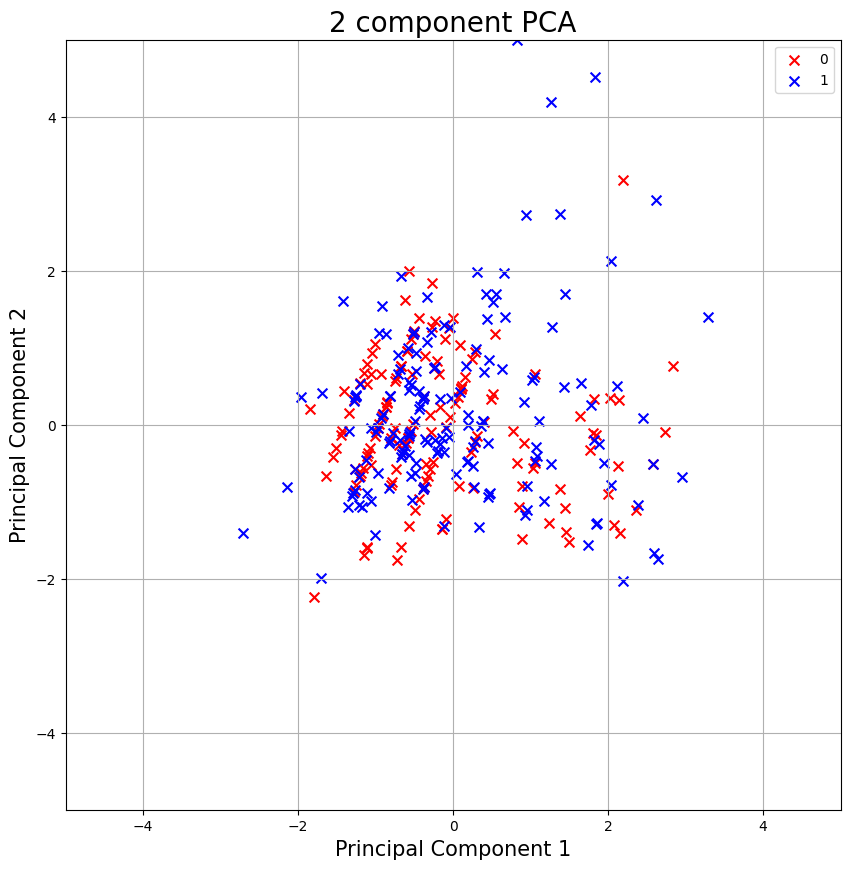

principal component 1  principal component 2  HeartDisease
count           5.640000e+02           5.640000e+02    564.000000
mean            3.779483e-17          -2.204698e-17      0.560284
std             1.105166e+00           9.861953e-01      0.496793
min            -2.715859e+00          -2.847944e+00      0.000000
25%            -7.707543e-01          -6.199039e-01      0.000000
50%            -2.521640e-01          -7.827194e-02      1.000000
75%             6.352549e-01           5.577746e-01      1.000000
max             3.897672e+00           5.295010e+00      1.000000

In [16]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1) 
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 component PCA', fontsize=20)

# Festlegen der Grenzen für x- und y-Achsen
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)

targets = [0, 1]
colors = ['r', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = finalDf['HeartDisease'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
               finalDf.loc[indicesToKeep, 'principal component 2'],
               c=color,
               marker="x",
               s=50)
ax.legend(targets)
ax.grid()

plt.show()

finalDf.describe()